# Optimized Stock Portfolio

The purpose of this project is to practice accessing and downloading financial data, calculating financial statistics to understand the individual performance of an asset and how groups of assets are related, and how to allocate investments across assets for optimal performance.

## Choosing stocks

<li>Technology - Alphabet (GOOGL)</li>
<li>Financial - Bank Of America (BAC)</li>
<li>Healthcare - GlaxoSmithKline (GSK)</li>
<li>Utilities - Chevron (CVX)</li>
<li>Consumer Goods - Procter & Gamble (PG)</li>

## Importing packages

In [1]:
import pandas as pd
import pandas_datareader as web
from matplotlib import pyplot as plt
from pypfopt import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import plotting
from pypfopt import cla

## Loading the adjusted closings for chosen stocks

In [2]:
symbols = ['GOOGL', 'BAC', 'GSK', 'CVX', 'PG']
start_date = '2010-01-01'
end_date = '2020-01-01'
stock_data = web.get_data_yahoo(symbols, start_date, end_date)['Adj Close']
stock_data.head(5)

Symbols,GOOGL,BAC,GSK,CVX,PG
Date,,,,,
2010-01-04,313.688690,14.010186,25.003736,53.047504,44.058792
2010-01-05,312.307312,14.465584,24.340384,53.423271,44.073223
2010-01-06,304.434448,14.635240,24.055264,53.429985,43.864162
2010-01-07,297.347351,15.117428,24.136724,53.228680,43.626297
2010-01-08,301.311310,14.983487,23.915604,53.322613,43.568630


## Plotting stock prices over time

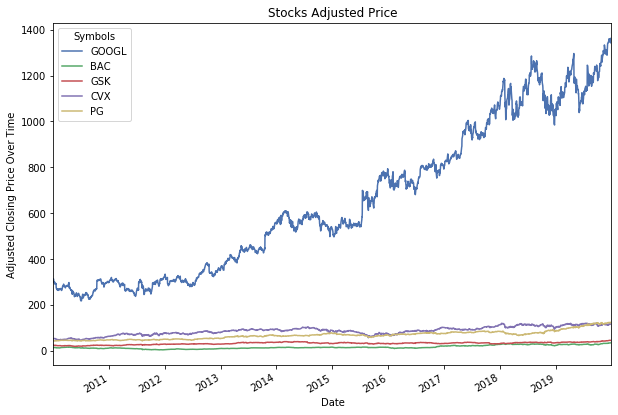

In [3]:
stock_data.plot(figsize=(10, 7))
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price Over Time')
plt.title('Stocks Adjusted Price')
plt.show()

## Calculating and plotting daily simple rate of return over time

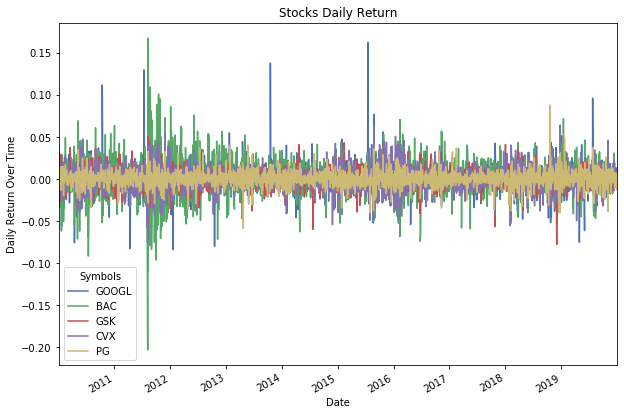

In [4]:
daily_return = stock_data.pct_change()
daily_return.plot(figsize=(10, 7))
plt.xlabel('Date')
plt.ylabel('Daily Return Over Time')
plt.title('Stocks Daily Return')
plt.show()

## Calculating and plottting mean of each stock's daily simple rate of return

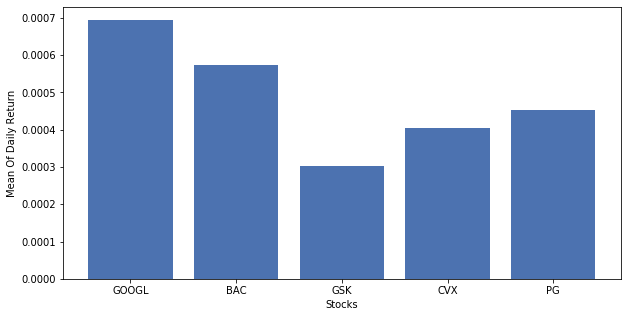

In [5]:
means_of_return = daily_return.mean()
plt.figure(figsize=(10, 5))
plt.bar(symbols, means_of_return)
plt.xlabel('Stocks')
plt.ylabel('Mean Of Daily Return')
plt.show()

## Calculating and plotting standard deviation of each stock's daily simple rate of return

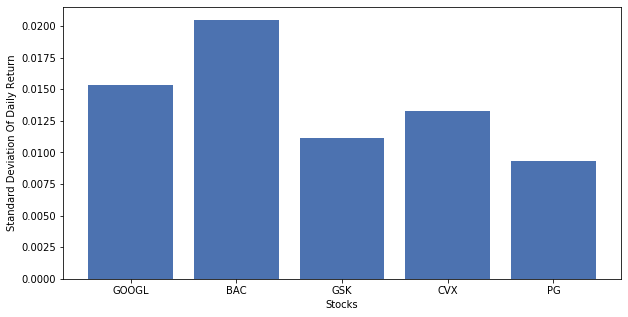

In [6]:
std_of_return = daily_return.std()
plt.figure(figsize=(10, 5))
plt.bar(symbols, std_of_return)
plt.xlabel('Stocks')
plt.ylabel('Standard Deviation Of Daily Return')
plt.show()

## Calculating correlations

In [7]:
daily_return.corr()

Symbols,GOOGL,BAC,GSK,CVX,PG
Symbols,,,,,
GOOGL,1.000000,0.392824,0.322391,0.368656,0.291001
BAC,0.392824,1.000000,0.331780,0.483120,0.261158
GSK,0.322391,0.331780,1.000000,0.411266,0.362334
CVX,0.368656,0.483120,0.411266,1.000000,0.371144
PG,0.291001,0.261158,0.362334,0.371144,1.000000


## Calculating expected returns and sample covariance

In [8]:
mu = expected_returns.mean_historical_return(stock_data)
S = risk_models.sample_cov(stock_data)

## Plotting efficient frontier

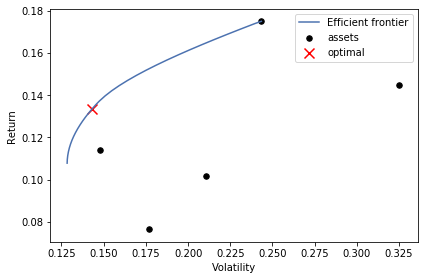

In [9]:
cla_obj = cla.CLA(mu, S)
plotting.Plotting.plot_efficient_frontier(cla_obj)
plt.show()

## Calculating different optimized portfolios weights

### Maximum Sharpe ratio

Expected annual return: 13.7%
Annual volatility: 14.7%
Sharpe Ratio: 0.79

{'GOOGL': 0.355, 'BAC': 0.042, 'GSK': 0.0, 'CVX': 0.002, 'PG': 0.6}


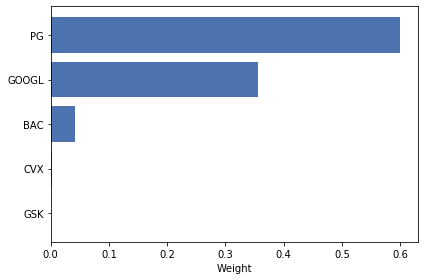

In [10]:
ef = EfficientFrontier(mu, S)
raw_weights = ef.max_sharpe()
ef.portfolio_performance(verbose=True)
print()
cleaned_weights = ef.clean_weights(rounding=3)
print(cleaned_weights)
plotting.Plotting.plot_weights(raw_weights)
plt.show()

### Minimum volatility

Expected annual return: 10.8%
Annual volatility: 12.8%
Sharpe Ratio: 0.68

{'GOOGL': 0.087, 'BAC': 0.0, 'GSK': 0.276, 'CVX': 0.099, 'PG': 0.538}


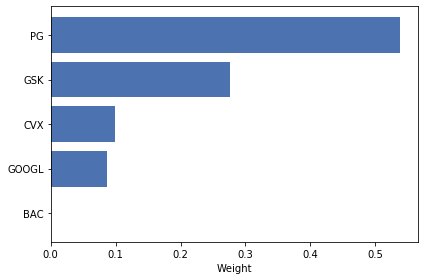

In [11]:
ef = EfficientFrontier(mu, S)
raw_weights = ef.min_volatility()
ef.portfolio_performance(verbose=True)
print()
cleaned_weights = ef.clean_weights(rounding=3)
print(cleaned_weights)
plotting.Plotting.plot_weights(raw_weights)
plt.show()

### Efficient risk

Expected annual return: 16.1%
Annual volatility: 20.0%
Sharpe Ratio: 0.71

{'GOOGL': 0.75, 'BAC': 0.045, 'GSK': 0.0, 'CVX': 0.0, 'PG': 0.206}


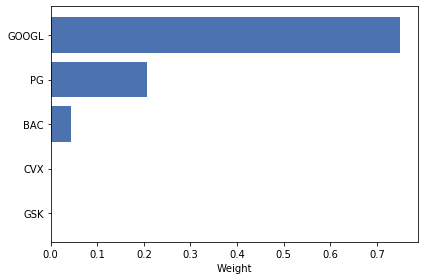

In [12]:
ef = EfficientFrontier(mu, S)
raw_weights = ef.efficient_risk(0.2)
ef.portfolio_performance(verbose=True)
print()
cleaned_weights = ef.clean_weights(rounding=3)
print(cleaned_weights)
plotting.Plotting.plot_weights(raw_weights)
plt.show()

### Efficient return

Expected annual return: 17.0%
Annual volatility: 22.7%
Sharpe Ratio: 0.66

{'GOOGL': 0.897, 'BAC': 0.045, 'GSK': 0.0, 'CVX': 0.0, 'PG': 0.058}


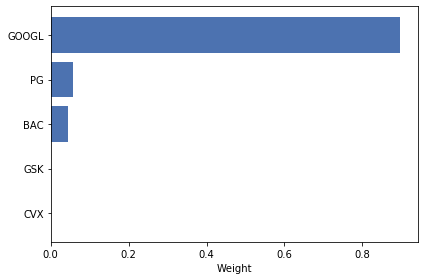

In [13]:
ef = EfficientFrontier(mu, S)
raw_weights = ef.efficient_return(0.17)
ef.portfolio_performance(verbose=True)
print()
cleaned_weights = ef.clean_weights(rounding=3)
print(cleaned_weights)
plotting.Plotting.plot_weights(raw_weights)
plt.show()